# Simple Linear Regression

In [1]:
import pandas as pd
import warnings as warn
warn.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("Boston_Housing_Dataset.csv")

In [3]:
dataset.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Here PRICE is meadin price and
LSTAT is % of population below poverty line

In [4]:
dataset.drop(columns="Unnamed: 0",inplace=True)

## Summarizing the data

In [5]:
dataset.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
dataset.shape
#506 rows and 14 columns

(506, 14)

In [7]:
dataset.info()
#dtype and non-null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
dataset.isna().sum()
#null count in each column

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [9]:
dataset.isna().sum().sum()
#total null count in dataset

0

In [10]:
dataset.duplicated().sum()
#count of duplicated values

0

In [11]:
dataset.describe()
#describing the ds

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Let's take dependent and independent variable from out Ds

In [12]:
# LSTAT is independent variable and 
# PRICE is dependent variable

In [13]:
single_LR = dataset.loc[:,['LSTAT','PRICE']]
single_LR.head(5)

,LSTAT,PRICE
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


## Visualizing variables

[]

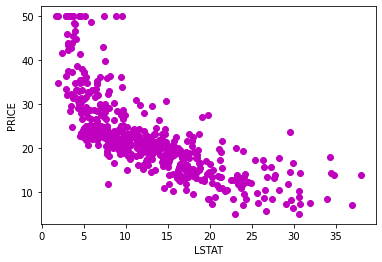

In [14]:
import matplotlib.pyplot as plt
plt.scatter(x=single_LR['LSTAT'],y=single_LR['PRICE'],marker='o',color='m')
plt.xlabel("LSTAT")
plt.ylabel("PRICE")
plt.plot()

#### Coclusion:


## Preparing data

In [15]:
X = pd.DataFrame(single_LR['LSTAT'])
y = pd.DataFrame(single_LR['PRICE'])

In [16]:
#checking size of each df
X.size, y.size

(506, 506)

In [17]:
# diving dataset into training and testing
#this is important as it helps check if the model works well on new, unseen data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#this means 80% should be in training set and 20% data should in testing set

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [19]:
#importing LinearRegression
from sklearn.linear_model import LinearRegression

#create instance of it and store it in regressor
regressor = LinearRegression()

#and then fit our model

regressor.fit(X_train,y_train)

LinearRegression()

In [20]:
#c in y=mx+c
print(regressor.intercept_)

[34.83694982]


In [21]:
#m in y=mx+c
print(regressor.coef_)

[[-0.9665309]]


In [22]:
#negative value of coef_ indicates that as independent variable increases
# value of dependent variable decreases

In [23]:
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred,columns=['Pred'])

In [24]:
checking_X = [[9.14]]
regressor.predict(checking_X)

array([[26.00285738]])

In [25]:
from sklearn import metrics
import numpy as np

In [26]:
# Evaluating the model
print("Mean absolute error: ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared error: ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared error: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error:  4.184807930623361
Mean Squared error:  33.51954917268488
Root Mean Squared error:  5.789606996393182


In [29]:
#lower the value of Root Mean Squared error 
#better the model

# Multiple Linear Regression

In [30]:
data = dataset = pd.read_csv("Boston_Housing_Dataset.csv")

In [31]:
data.drop(columns=("Unnamed: 0"),inplace=True)

In [32]:
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [34]:
X = pd.DataFrame(data.iloc[:,:-1])
y = pd.DataFrame(data.iloc[:,-1])

In [41]:
len(X.columns)

13

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [36]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [37]:
#c in y=mx+c
print(reg.intercept_)

[31.63108404]


In [43]:
#m in y=mx+C
print(reg.coef_)

[[-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
  -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
   2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
  -5.47113313e-01]]


In [44]:
y_pred = reg.predict(X_test)
y_pred = pd.DataFrame(y_pred,columns=['Predicted'])

In [45]:
# Evaluating the model
print("Mean absolute error: ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared error: ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared error: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error:  3.1627098714574156
Mean Squared error:  21.517444231177286
Root Mean Squared error:  4.638689926172829


In [ ]:
# for 1st 
Mean absolute error:  4.184807930623361
Mean Squared error:  33.51954917268488
Root Mean Squared error:  5.789606996393182
    
#for 2nd
Mean absolute error:  3.1627098714574156
Mean Squared error:  21.517444231177286
Root Mean Squared error:  4.638689926172829

In [ ]:
2nd model is better than 1st as it has less value of Root Mean Squared error